In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os 
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
## Funciones utilizadas

#### Elimina caracteres y convierte la columna a un tipo de dato
def ReplaceAndConvert(df , column_name):
    df[column_name] = [s.replace(',','') for s in df[column_name]] 
    df[column_name] = df[column_name].astype('int64')
    return df

In [4]:
file = pd.read_csv('C:/Users/Andres/OneDrive - Universidad del rosario/Escritorio/sql_data/daily-website-visitors.csv')

In [5]:
file.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9-14-2014,"2,146","1,582","1,430",152
1,2,Monday,2,9-15-2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9-16-2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9-17-2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9-18-2014,"3,316","2,366","2,130",236


In [6]:
file.tail(30)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
2137,2138,Tuesday,3,7-21-2020,"3,786","2,889","2,450",439
2138,2139,Wednesday,4,7-22-2020,"4,002","3,039","2,566",473
2139,2140,Thursday,5,7-23-2020,"3,823","3,033","2,525",508
2140,2141,Friday,6,7-24-2020,"3,430","2,623","2,262",361
2141,2142,Saturday,7,7-25-2020,"2,400","1,767","1,487",280
2142,2143,Sunday,1,7-26-2020,"2,835","2,207","1,869",338
2143,2144,Monday,2,7-27-2020,"4,001","3,031","2,523",508
2144,2145,Tuesday,3,7-28-2020,"3,795","2,969","2,525",444
2145,2146,Wednesday,4,7-29-2020,"3,903","3,010","2,591",419
2146,2147,Thursday,5,7-30-2020,"3,397","2,687","2,265",422


# 1. Cleaning the data


In [7]:
file.dtypes

Row                   int64
Day                  object
Day.Of.Week           int64
Date                 object
Page.Loads           object
Unique.Visits        object
First.Time.Visits    object
Returning.Visits     object
dtype: object

In [8]:
file['Date'] = pd.to_datetime(file['Date'], format='%m-%d-%Y')

In [9]:
file.dtypes

Row                           int64
Day                          object
Day.Of.Week                   int64
Date                 datetime64[ns]
Page.Loads                   object
Unique.Visits                object
First.Time.Visits            object
Returning.Visits             object
dtype: object

In [10]:
file.head(10)

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,"2,146","1,582","1,430",152
1,2,Monday,2,2014-09-15,"3,621","2,528","2,297",231
2,3,Tuesday,3,2014-09-16,"3,698","2,630","2,352",278
3,4,Wednesday,4,2014-09-17,"3,667","2,614","2,327",287
4,5,Thursday,5,2014-09-18,"3,316","2,366","2,130",236
5,6,Friday,6,2014-09-19,"2,815","1,863","1,622",241
6,7,Saturday,7,2014-09-20,"1,658","1,118",985,133
7,8,Sunday,1,2014-09-21,"2,288","1,656","1,481",175
8,9,Monday,2,2014-09-22,"3,638","2,586","2,312",274
9,10,Tuesday,3,2014-09-23,"4,462","3,257","2,989",268


In [45]:
file['Day'] = pd.to_datetime(file['Date'], format='%m-%d-%Y')


KeyError: 'Date'

In [12]:
file.rename(columns = {'Day': 'Web_Day', 'Day.Of.Week':'Web_Week_Day','Page.Loads': 'Page_Loads',
                         'Date': 'Web_Date', 'Unique.Visits': 'Unique_Visits', 'First.Time.Visits':'First_Time_Visits',
                        'Returning.Visits':'Returning_Visits'}, inplace=True)

In [13]:
file.head()

,Row,Web_Day,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,2014-09-14,1,2014-09-14,"2,146","1,582","1,430",152
1,2,2014-09-15,2,2014-09-15,"3,621","2,528","2,297",231
2,3,2014-09-16,3,2014-09-16,"3,698","2,630","2,352",278
3,4,2014-09-17,4,2014-09-17,"3,667","2,614","2,327",287
4,5,2014-09-18,5,2014-09-18,"3,316","2,366","2,130",236


In [14]:
file['Page_Loads'] = file['Page_Loads'].str.strip(',')

In [15]:
file.head()

,Row,Web_Day,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,2014-09-14,1,2014-09-14,"2,146","1,582","1,430",152
1,2,2014-09-15,2,2014-09-15,"3,621","2,528","2,297",231
2,3,2014-09-16,3,2014-09-16,"3,698","2,630","2,352",278
3,4,2014-09-17,4,2014-09-17,"3,667","2,614","2,327",287
4,5,2014-09-18,5,2014-09-18,"3,316","2,366","2,130",236


In [17]:
file['Page_Loads'] = [s.replace(',','') for s in file.Page_Loads]

In [18]:
file['Page_Loads'] = file['Page_Loads'].astype('int64')

In [19]:
ReplaceAndConvert(file, 'Unique_Visits')

,Row,Web_Day,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,2014-09-14,1,2014-09-14,2146,1582,"1,430",152
1,2,2014-09-15,2,2014-09-15,3621,2528,"2,297",231
2,3,2014-09-16,3,2014-09-16,3698,2630,"2,352",278
3,4,2014-09-17,4,2014-09-17,3667,2614,"2,327",287
4,5,2014-09-18,5,2014-09-18,3316,2366,"2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,2020-08-15,7,2020-08-15,2221,1696,"1,373",323
2163,2164,2020-08-16,1,2020-08-16,2724,2037,"1,686",351
2164,2165,2020-08-17,2,2020-08-17,3456,2638,"2,181",457
2165,2166,2020-08-18,3,2020-08-18,3581,2683,"2,184",499


In [20]:
ReplaceAndConvert(file, 'First_Time_Visits')

,Row,Web_Day,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,2014-09-14,1,2014-09-14,2146,1582,1430,152
1,2,2014-09-15,2,2014-09-15,3621,2528,2297,231
2,3,2014-09-16,3,2014-09-16,3698,2630,2352,278
3,4,2014-09-17,4,2014-09-17,3667,2614,2327,287
4,5,2014-09-18,5,2014-09-18,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,2020-08-15,7,2020-08-15,2221,1696,1373,323
2163,2164,2020-08-16,1,2020-08-16,2724,2037,1686,351
2164,2165,2020-08-17,2,2020-08-17,3456,2638,2181,457
2165,2166,2020-08-18,3,2020-08-18,3581,2683,2184,499


In [21]:
ReplaceAndConvert(file, 'Returning_Visits')

,Row,Web_Day,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,2014-09-14,1,2014-09-14,2146,1582,1430,152
1,2,2014-09-15,2,2014-09-15,3621,2528,2297,231
2,3,2014-09-16,3,2014-09-16,3698,2630,2352,278
3,4,2014-09-17,4,2014-09-17,3667,2614,2327,287
4,5,2014-09-18,5,2014-09-18,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,2020-08-15,7,2020-08-15,2221,1696,1373,323
2163,2164,2020-08-16,1,2020-08-16,2724,2037,1686,351
2164,2165,2020-08-17,2,2020-08-17,3456,2638,2181,457
2165,2166,2020-08-18,3,2020-08-18,3581,2683,2184,499


In [86]:
file.dtypes

Row                           int64
Web_Day                      object
Web_Week_Day                  int64
Web_Date             datetime64[ns]
Page_Loads                    int64
Unique_Visits                 int64
First_Time_Visits             int64
Returning_Visits              int64
dtype: object

In [90]:
file.to_csv('C:/Users/Andres/OneDrive - Universidad del rosario/Escritorio/Datasets/WebProject.csv')

In [92]:
file.head(30)

,Row,Web_Day,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236
5,6,Friday,6,2014-09-19,2815,1863,1622,241
6,7,Saturday,7,2014-09-20,1658,1118,985,133
7,8,Sunday,1,2014-09-21,2288,1656,1481,175
8,9,Monday,2,2014-09-22,3638,2586,2312,274
9,10,Tuesday,3,2014-09-23,4462,3257,2989,268


## 2. EDA

In [22]:
Subs_corr = file.iloc[:,[2,3,4,5,6,7]]
Subs_corr

,Web_Week_Day,Web_Date,Page_Loads,Unique_Visits,First_Time_Visits,Returning_Visits
0,1,2014-09-14,2146,1582,1430,152
1,2,2014-09-15,3621,2528,2297,231
2,3,2014-09-16,3698,2630,2352,278
3,4,2014-09-17,3667,2614,2327,287
4,5,2014-09-18,3316,2366,2130,236
...,...,...,...,...,...,...
2162,7,2020-08-15,2221,1696,1373,323
2163,1,2020-08-16,2724,2037,1686,351
2164,2,2020-08-17,3456,2638,2181,457
2165,3,2020-08-18,3581,2683,2184,499


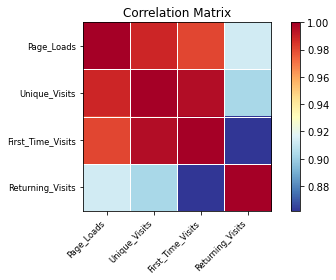

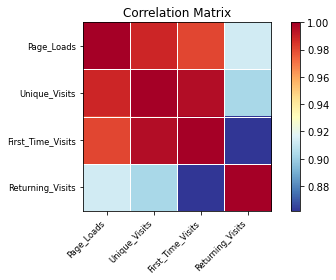

In [23]:
corr = Subs_corr.set_index('Web_Week_Day').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))


In [24]:
Days_Max = file.groupby('Web_Week_Day').agg(
           Page_loads_day=('Page_Loads', sum),
          Unique_Visits_Total=('Unique_Visits', sum),
          First_Time_Visits_Total=('First_Time_Visits', sum),
          Returning_Visits_Total=('Returning_Visits', sum)
).reset_index()
Days_Max

,Web_Week_Day,Page_loads_day,Unique_Visits_Total,First_Time_Visits_Total,Returning_Visits_Total
0,1,1006564,725794,604198,121596
1,2,1502161,1072112,886036,186076
2,3,1536154,1097181,907752,189429
3,4,1517114,1085624,897602,188022
4,5,1437269,1028214,848921,179293
5,6,1149437,817852,668805,149047
6,7,772817,552105,456449,95656


In [140]:
type(Days_Max)

pandas.core.frame.DataFrame

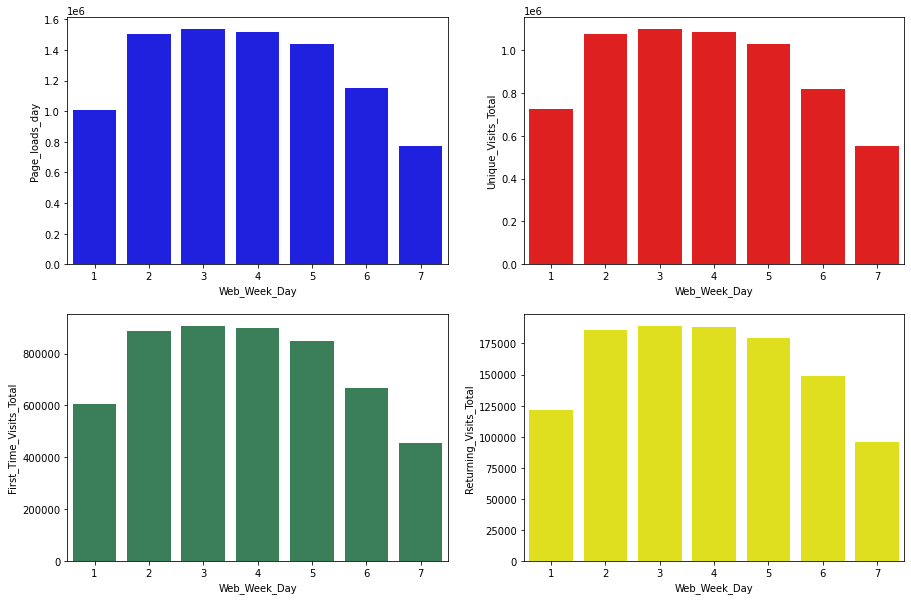

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))


sns.barplot(x=Days_Max['Web_Week_Day'], y=Days_Max['Page_loads_day'], color='blue', ax=axes[0,0]);
sns.barplot(x=Days_Max['Web_Week_Day'], y=Days_Max['Unique_Visits_Total'], color='red',ax=axes[0,1]);
sns.barplot(x=Days_Max['Web_Week_Day'], y=Days_Max['First_Time_Visits_Total'], color='seagreen',ax=axes[1,0]);
sns.barplot(x=Days_Max['Web_Week_Day'], y=Days_Max['Returning_Visits_Total'], color='yellow',ax=axes[1,1]);


In [84]:
Total_First_Time = sum(Days_Max.First_Time_Visits_Total)
Total_Returning_Visits = sum(Days_Max.Returning_Visits_Total)
Days_Max['% First_Time_Visits_Total'] = Days_Max.First_Time_Visits_Total / Total_First_Time
Days_Max['% Returning_Visits_Total'] = Days_Max.Returning_Visits_Total / Total_Returning_Visits
Days_Max

,Web_Week_Day,Page_loads_day,Unique_Visits_Total,First_Time_Visits_Total,Returning_Visits_Total,% First_Time_Visits_Total,% Returning_Visits_Total
0,1,1006564,725794,604198,121596,0.114654,0.109633
1,2,1502161,1072112,886036,186076,0.168136,0.167769
2,3,1536154,1097181,907752,189429,0.172257,0.170792
3,4,1517114,1085624,897602,188022,0.170331,0.169524
4,5,1437269,1028214,848921,179293,0.161093,0.161654
5,6,1149437,817852,668805,149047,0.126914,0.134383
6,7,772817,552105,456449,95656,0.086617,0.086245


In [85]:
perc_days = Days_Max.iloc[:,[0,5,6]]
perc_days.insert(loc=1, column='Day', value=['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday'])
perc_days

,Web_Week_Day,Day,% First_Time_Visits_Total,% Returning_Visits_Total
0,1,Sunday,0.114654,0.109633
1,2,Monday,0.168136,0.167769
2,3,Tuesday,0.172257,0.170792
3,4,Wednesday,0.170331,0.169524
4,5,Thursday,0.161093,0.161654
5,6,Friday,0.126914,0.134383
6,7,Saturday,0.086617,0.086245


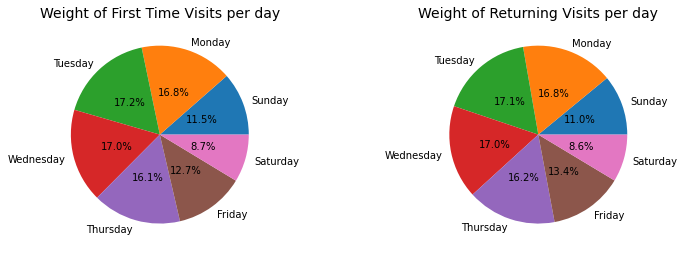

In [87]:
pie, ax = plt.subplots(figsize=[26,9])
plt.subplot(2, 4, 1)
labels = perc_days.Day
plt.pie(x=perc_days['% First_Time_Visits_Total'],autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Weight of First Time Visits per day", fontsize=14);


plt.subplot(2, 4, 2)
labels = perc_days.Day
plt.pie(x=perc_days['% Returning_Visits_Total'],autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Weight of Returning Visits per day", fontsize=14);

